***Importing Packages***

In [1]:
import re
import requests
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Dropout
import matplotlib.pyplot as plt
from numpy.random import seed
import tensorflow as tf
from sklearn import preprocessing 
from keras.preprocessing.sequence import pad_sequences
import keras
import os
from tensorflow.keras.utils import to_categorical, plot_model
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
import numpy as np  # Numpy used for manipulating data in Dataframe
import pandas as pd # Pandas used for CSV files
import matplotlib.pyplot as plt
from collections import Counter # Container used for counting instances of elements in container
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator # Using NLP to perform EDA
import re
from textblob import TextBlob
import nltk
nltk.download('punkt')
import nltk
from keras.preprocessing.sequence import pad_sequences
from nltk.tokenize import word_tokenize
import cufflinks as cf
from keras import Input
from keras.models import Model
from keras.layers import Embedding, LSTM, concatenate, Dense
from keras.preprocessing.text import Tokenizer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


***Importing csv files***

In [2]:
train = pd.read_csv("/content/train.csv")
test = pd.read_csv("/content/test.csv")

***Exploratory Data Analysis***

In [3]:
# Shape of dataset
print("Shape of the Train DataSet \n")
print(train.head())  # View initial rows of data 
print(train.shape) # To get a tuple representing the dimensionality of my df
print("\n Label", Counter(train['label'])) # Different labels being counted

Shape of the Train DataSet 

       id  tid1  tid2                                          title1_en  \
0  195611     0     1  There are two new old-age insurance benefits f...   
1  191474     2     3  "If you do not come to Shenzhen, sooner or lat...   
2   25300     2     4  "If you do not come to Shenzhen, sooner or lat...   
3  123757     2     8  "If you do not come to Shenzhen, sooner or lat...   
4  141761     2    11  "If you do not come to Shenzhen, sooner or lat...   

                                           title2_en      label  
0  Police disprove "bird's nest congress each per...  unrelated  
1  Shenzhen's GDP outstrips Hong Kong? Shenzhen S...  unrelated  
2  The GDP overtopped Hong Kong? Shenzhen clarifi...  unrelated  
3  Shenzhen's GDP overtakes Hong Kong? Bureau of ...  unrelated  
4  Shenzhen's GDP outpaces Hong Kong? Defending R...  unrelated  
(256442, 6)

 Label Counter({'unrelated': 175598, 'agreed': 74238, 'disagreed': 6606})


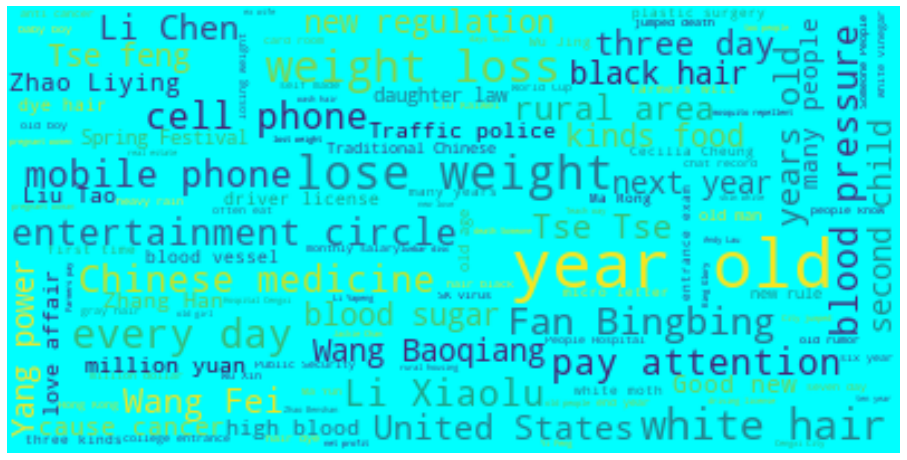

In [4]:
L1 = train['title1_en'].tolist()  # Converting series to list
str_L1 = ' '.join(map(str, L1)) # Each item of list converted to string then joined
str_L1 = str_L1.replace('"', '')  # All instances of 1st arg. to be replaced with 2nd arg.
text1 = str_L1  # Creating copy
# Creating & generating word cloud img.
wordcloud = WordCloud(max_font_size=30, max_words=120, background_color="cyan").generate(text1)
plt.figure(figsize = (16,16))
plt.imshow(wordcloud, interpolation="bilinear") # Printing the generated img.
plt.axis("off")
plt.show()

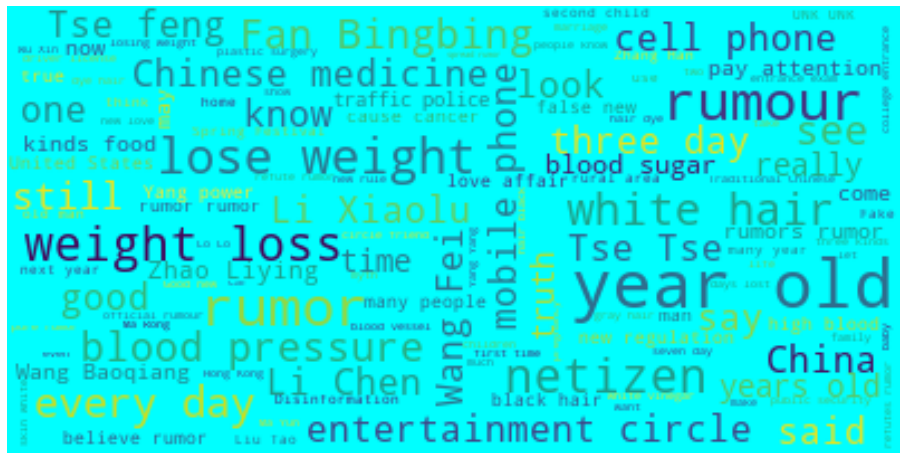

In [5]:
L2 = train['title2_en'].tolist()
str_L2 = ' '.join(map(str, L2))
str_L2 = str_L2.replace('"', '')
text2 = str_L2
# wordcloud = WordCloud().generate(text2)
wordcloud = WordCloud(max_font_size=30, max_words=120, background_color="cyan").generate(text2)
plt.figure(figsize = (16,16))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

0         0.10000
1         0.00000
2         0.15625
3         0.00000
4         0.00000
           ...   
256437    0.00000
256438   -0.18750
256439    0.00000
256440    0.20000
256441    0.00000
Name: polarity2, Length: 256442, dtype: float64


0         0.078788
1        -0.083333
2        -0.083333
3        -0.083333
4        -0.083333
            ...   
256437    0.150000
256438    0.150000
256439    0.150000
256440    0.150000
256441    0.000000
Name: polarity1, Length: 256442, dtype: float64




array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc25b05aed0>,
      dtype=object)

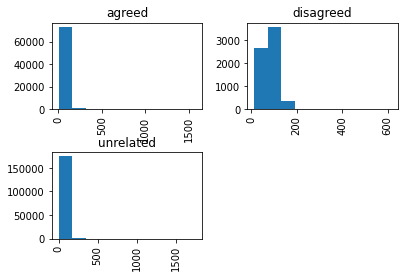

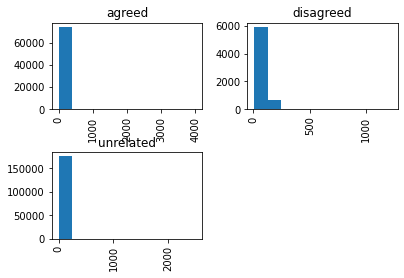

In [6]:
# Polarity calculation
cf.go_offline() # Activating this mode for interactive plotting
cf.set_config_file(offline=False, world_readable=True)
train['polarity2'] = train['title2_en'].map(lambda text: TextBlob(text).sentiment.polarity) # Calculating polarity of the new coming news
print(train['polarity2'])
print('\n')
train['polarity1'] = train['title1_en'].map(lambda text: TextBlob(text).sentiment.polarity) # Calculating polarity of the existing fake news
print(train['polarity1'])
print('\n')
# Plots based on the labels
train['title1_en'].str.len().hist(by=train['label'])  # Histogram of length of each string in title1_en in separate groups based on label.
train['title2_en'].str.len().hist(by=train['label'])  # Histogram of length of each string in title2_en in separate groups based on the label.

***Data Preprocessing***

In [7]:
print("\nNull Values", train.isnull().sum()) # Returning total number of missing values
train = train.dropna()  # Removing all missing values
print("\nAfter dropping null values")
print(train.isnull().sum())  # Rechecking to confirm the removal of missing values
print("\nFinal Train data head after null value:")
train.head()


Null Values id           0
tid1         0
tid2         0
title1_en    0
title2_en    0
label        0
polarity2    0
polarity1    0
dtype: int64

After dropping null values
id           0
tid1         0
tid2         0
title1_en    0
title2_en    0
label        0
polarity2    0
polarity1    0
dtype: int64

Final Train data head after null value:


,id,tid1,tid2,title1_en,title2_en,label,polarity2,polarity1
0,195611,0,1,There are two new old-age insurance benefits f...,"Police disprove ""bird's nest congress each per...",unrelated,0.10000,0.078788
1,191474,2,3,"""If you do not come to Shenzhen, sooner or lat...",Shenzhen's GDP outstrips Hong Kong? Shenzhen S...,unrelated,0.00000,-0.083333
2,25300,2,4,"""If you do not come to Shenzhen, sooner or lat...",The GDP overtopped Hong Kong? Shenzhen clarifi...,unrelated,0.15625,-0.083333
3,123757,2,8,"""If you do not come to Shenzhen, sooner or lat...",Shenzhen's GDP overtakes Hong Kong? Bureau of ...,unrelated,0.00000,-0.083333
4,141761,2,11,"""If you do not come to Shenzhen, sooner or lat...",Shenzhen's GDP outpaces Hong Kong? Defending R...,unrelated,0.00000,-0.083333


In [8]:
# If null data was found, we have to reset the index
train = train.copy()
# train_data
train.reset_index(inplace=True)
train

,index,id,tid1,tid2,title1_en,title2_en,label,polarity2,polarity1
0,0,195611,0,1,There are two new old-age insurance benefits f...,"Police disprove ""bird's nest congress each per...",unrelated,0.10000,0.078788
1,1,191474,2,3,"""If you do not come to Shenzhen, sooner or lat...",Shenzhen's GDP outstrips Hong Kong? Shenzhen S...,unrelated,0.00000,-0.083333
2,2,25300,2,4,"""If you do not come to Shenzhen, sooner or lat...",The GDP overtopped Hong Kong? Shenzhen clarifi...,unrelated,0.15625,-0.083333
3,3,123757,2,8,"""If you do not come to Shenzhen, sooner or lat...",Shenzhen's GDP overtakes Hong Kong? Bureau of ...,unrelated,0.00000,-0.083333
4,4,141761,2,11,"""If you do not come to Shenzhen, sooner or lat...",Shenzhen's GDP outpaces Hong Kong? Defending R...,unrelated,0.00000,-0.083333
...,...,...,...,...,...,...,...,...,...
256437,256437,113364,167562,48447,egypt 's presidential election failed to win m...,Salah is retiring? Football Association offici...,unrelated,0.00000,0.150000
256438,256438,49407,167562,49795,egypt 's presidential election failed to win m...,Liverpool's bid for Little Germany? The Echo's...,unrelated,-0.18750,0.150000
256439,256439,130134,167562,114783,egypt 's presidential election failed to win m...,West Media Exposing Tallahlach has been recomm...,unrelated,0.00000,0.150000
256440,256440,101494,167562,137705,egypt 's presidential election failed to win m...,Rumor has it that Egypt is very united and the...,unrelated,0.20000,0.150000


In [9]:
Max_Words = 2000  # Id of most frequent words of vocab.'s number = Max_Words
Max_Seq_Length = 256 # Max. length of any given sequence

def do_tokenization(sentence):
    word_tokens = word_tokenize(sentence) # Tokenizing the sentence 
    tokenized_words = [word_token for word_token in word_tokens if word_token.isalpha()]  # If token = alphabet, store in var. 
    return tokenized_words

train['title2_en_tokenized'] = train.loc[:,'title2_en'].apply(do_tokenization)  # Accessing tokenized data from title2_en
train['title1_en_tokenized'] = train.loc[:,'title1_en'].apply(do_tokenization)  # Accessing tokenized data from title1_en

tokenizer = Tokenizer(num_words = Max_Words)
corpus = pd.concat([train['title1_en_tokenized'], train['title2_en_tokenized']])  # Combining the 2 series we created, along the same axis; basically creating our own dictionary (of sorts).
tokenizer.fit_on_texts(corpus)  # We assign a unique integer value (beginning from 1) to all words (arranged) in desc. order of their freq.

In [10]:
train['title1_en_tokenized'] # Viewing tokenized sentneces

0         [There, are, two, new, insurance, benefits, fo...
1         [If, you, do, not, come, to, Shenzhen, sooner,...
2         [If, you, do, not, come, to, Shenzhen, sooner,...
3         [If, you, do, not, come, to, Shenzhen, sooner,...
4         [If, you, do, not, come, to, Shenzhen, sooner,...
                                ...                        
256437    [egypt, presidential, election, failed, to, wi...
256438    [egypt, presidential, election, failed, to, wi...
256439    [egypt, presidential, election, failed, to, wi...
256440    [egypt, presidential, election, failed, to, wi...
256441    [Will, the, United, States, wage, war, on, Ira...
Name: title1_en_tokenized, Length: 256442, dtype: object

In [11]:
train['title2_en_tokenized'] # Viewing tokenized sentneces

0         [Police, disprove, bird, nest, congress, each,...
1         [Shenzhen, GDP, outstrips, Hong, Kong, Shenzhe...
2         [The, GDP, overtopped, Hong, Kong, Shenzhen, c...
3         [Shenzhen, GDP, overtakes, Hong, Kong, Bureau,...
4         [Shenzhen, GDP, outpaces, Hong, Kong, Defendin...
                                ...                        
256437    [Salah, is, retiring, Football, Association, o...
256438    [Liverpool, bid, for, Little, Germany, The, Ec...
256439    [West, Media, Exposing, Tallahlach, has, been,...
256440    [Rumor, has, it, that, Egypt, is, very, united...
256441    [Saddam, daughter, refutes, rumors, no, of, Sa...
Name: title2_en_tokenized, Length: 256442, dtype: object

In [12]:
title1 = tokenizer.texts_to_sequences(train['title1_en_tokenized'])  # Each word of our corpus replaced with the series of unique int. it was assigned in the previous step; so it's easier to feed them to the network. 
x1_train = pad_sequences(title1, maxlen=Max_Seq_Length)  # Transforming list of sequences to 2D np array (of shape samples calc. in prev. step, longest seq. length); if values missing, they are padded with 0 to reach max_seq_length.

title2 = tokenizer.texts_to_sequences(train['title2_en_tokenized'])
x2_train = pad_sequences(title2, maxlen=Max_Seq_Length)

print(x1_train)
print('\n')
print(x2_train)

[[  0   0   0 ...   9 406 170]
 [  0   0   0 ...  15 511 646]
 [  0   0   0 ...  15 511 646]
 ...
 [  0   0   0 ...   3   7 367]
 [  0   0   0 ...   3   7 367]
 [  0   0   0 ... 274   1   3]]


[[   0    0    0 ...  211    2  337]
 [   0    0    0 ...   65    1    5]
 [   0    0    0 ...  140 1179   41]
 ...
 [   0    0    0 ...  160    8  122]
 [   0    0    0 ...   30  594  369]
 [   0    0    0 ...   24   30    3]]


In [13]:
label_to_index = {'unrelated' : 0, 'agreed' : 1, 'disagreed' : 2} # Label mapping

y_train = train.label.apply(lambda lab : label_to_index[lab])  # Small function w/ single arg.
y_train = np.asarray(y_train).astype('float32') # Creating an array then converting to float type.

y_train [:10] # Sample from above created array

array([0., 0., 0., 0., 0., 1., 1., 1., 0., 1.], dtype=float32)

In [14]:
train.label[:5]

0    unrelated
1    unrelated
2    unrelated
3    unrelated
4    unrelated
Name: label, dtype: object

In [15]:
from keras.utils.np_utils import to_categorical
import keras
y_train = keras.utils.np_utils.to_categorical(y_train)  # Creating to binary class matrix (containing 1s at the mentioned indices [wherever y_train has data] and 0s in the rest of the spaces)
y_train[:15]

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

In [16]:
# Splitting into Training & Validation sets
x1_train, x1_test, x2_train, x2_test, y_train, y_test = train_test_split(x1_train, x2_train, y_train , test_size = 0.2 , random_state = 42) 
# test_size = The proportion of dataset to include in test split.
# Using an int. for random_state for producing same results on different calls.

In [17]:
Lstm_Units = 128
Embed_Dim = 128

In [18]:
InputA = keras.layers.Input(shape=(Max_Seq_Length, ), dtype='int32')
InputB = keras.layers.Input(shape=(Max_Seq_Length, ), dtype='int32')
embedding_layer = keras.layers.Embedding(Max_Words, Embed_Dim)
EmbedA = embedding_layer(InputA)
EmbedB = embedding_layer(InputB)
LstmLayer = keras.layers.LSTM(Lstm_Units)
OutputA = LstmLayer(EmbedA)
OutputB = LstmLayer(EmbedB)
Concat_Layer = keras.layers.concatenate([OutputA, OutputB], axis=-1) # Combine the output of the two branches
DenseLayer = keras.layers.Dense(units=3, activation='softmax')
Pred_Data = DenseLayer(Concat_Layer)
modelA = Model(inputs=[InputA, InputB], outputs=Pred_Data)
modelA.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256)]        0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 256)]        0           []                               
                                                                                                  
 embedding (Embedding)          (None, 256, 128)     256000      ['input_1[0][0]',                
                                                                  'input_2[0][0]']                
                                                                                                  
 lstm (LSTM)                    (None, 128)          131584      ['embedding[0][0]',          

In [19]:
InputA = keras.layers.Input(shape=(Max_Seq_Length, ), dtype='int32')
InputB = keras.layers.Input(shape=(Max_Seq_Length, ), dtype='int32')
embedding_layerA = keras.layers.Embedding(Max_Words, Embed_Dim)
embedding_layerB = keras.layers.Embedding(Max_Words, Embed_Dim)
EmbedA = embedding_layerA(InputA)
EmbedB = embedding_layerB(InputB)
LstmLayerA = keras.layers.LSTM(Lstm_Units)
LstmLayerB = keras.layers.LSTM(Lstm_Units)
OutputA = LstmLayerA(EmbedA)
OutputB = LstmLayerB(EmbedB)
Concat_Layer = keras.layers.concatenate([OutputA, OutputB], axis=-1) # Combine the output of the two branches
DenseLayer = keras.layers.Dense(units=3, activation='softmax')
Pred_Data = DenseLayer(Concat_Layer)
modelB = Model(inputs=[InputA, InputB], outputs=Pred_Data)
modelB.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 256)]        0           []                               
                                                                                                  
 input_4 (InputLayer)           [(None, 256)]        0           []                               
                                                                                                  
 embedding_1 (Embedding)        (None, 256, 128)     256000      ['input_3[0][0]']                
                                                                                                  
 embedding_2 (Embedding)        (None, 256, 128)     256000      ['input_4[0][0]']                
                                                                                            

In [22]:
# model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
modelA.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
modelB.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [23]:
Batch_size = 128
Epoch = 15

historyA = modelA.fit(x = [x1_train, x2_train], y = y_train, batch_size = Batch_size, epochs = Epoch, validation_data = ([x1_test, x2_test], y_test), shuffle = True)

Epoch 1/15
1603/1603 [==============================] - 69s 42ms/step - loss: 0.5456 - accuracy: 0.7314 - val_loss: 0.5151 - val_accuracy: 0.7508
Epoch 2/15
1603/1603 [==============================] - 64s 40ms/step - loss: 0.4873 - accuracy: 0.7667 - val_loss: 0.4842 - val_accuracy: 0.7709
Epoch 3/15
1603/1603 [==============================] - 64s 40ms/step - loss: 0.4546 - accuracy: 0.7876 - val_loss: 0.4711 - val_accuracy: 0.7803
Epoch 4/15
1603/1603 [==============================] - 64s 40ms/step - loss: 0.4260 - accuracy: 0.8031 - val_loss: 0.4589 - val_accuracy: 0.7882
Epoch 5/15
1603/1603 [==============================] - 64s 40ms/step - loss: 0.3995 - accuracy: 0.8184 - val_loss: 0.4547 - val_accuracy: 0.7936
Epoch 6/15
1603/1603 [==============================] - 69s 43ms/step - loss: 0.3745 - accuracy: 0.8316 - val_loss: 0.4464 - val_accuracy: 0.8024
Epoch 7/15
1603/1603 [==============================] - 64s 40ms/step - loss: 0.3501 - accuracy: 0.8449 - val_loss: 0.4490 -

In [24]:
Batch_size = 128
Epoch = 15

historyB = modelB.fit(x = [x1_train, x2_train], y = y_train, batch_size = Batch_size, epochs = Epoch, validation_data = ([x1_test, x2_test], y_test), shuffle = True)

Epoch 1/15
1603/1603 [==============================] - 67s 40ms/step - loss: 0.5597 - accuracy: 0.7269 - val_loss: 0.5201 - val_accuracy: 0.7508
Epoch 2/15
1603/1603 [==============================] - 64s 40ms/step - loss: 0.4978 - accuracy: 0.7644 - val_loss: 0.4992 - val_accuracy: 0.7670
Epoch 3/15
1603/1603 [==============================] - 64s 40ms/step - loss: 0.4698 - accuracy: 0.7819 - val_loss: 0.4833 - val_accuracy: 0.7751
Epoch 4/15
1603/1603 [==============================] - 64s 40ms/step - loss: 0.4451 - accuracy: 0.7978 - val_loss: 0.4788 - val_accuracy: 0.7777
Epoch 5/15
1603/1603 [==============================] - 64s 40ms/step - loss: 0.4211 - accuracy: 0.8127 - val_loss: 0.4775 - val_accuracy: 0.7779
Epoch 6/15
1603/1603 [==============================] - 64s 40ms/step - loss: 0.3997 - accuracy: 0.8241 - val_loss: 0.4628 - val_accuracy: 0.7886
Epoch 7/15
1603/1603 [==============================] - 64s 40ms/step - loss: 0.3780 - accuracy: 0.8364 - val_loss: 0.4606 -

In [25]:
# Accuracy histograms being plotted using this function
def plot_accuracy_hists(x, y1, y2, xlabel, ylabel, label, title):
    plt.plot(x, y1,'g',label='Training ' + label)
    plt.plot(x, y2,'b',label='Valdiation ' + label)
    plt.title(title)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.legend()
    plt.show()

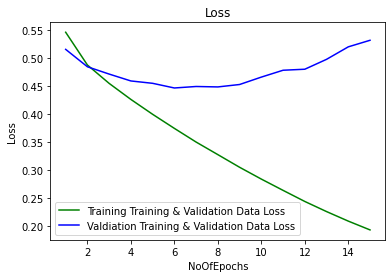

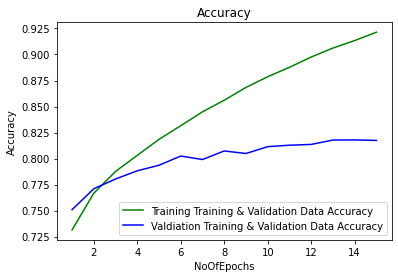

In [26]:
history_model_values = historyA.history  # Callback which records events into a History obj.
# Plotting graphs for following data
cnt = historyA.history['accuracy']
plot_accuracy_hists(range(1, len(cnt) + 1), history_model_values['loss'], history_model_values['val_loss'], 'NoOfEpochs', 'Loss', 'Training & Validation Data Loss', 'Loss')

plot_accuracy_hists(range(1, len(cnt) + 1), history_model_values['accuracy'], history_model_values['val_accuracy'], 'NoOfEpochs', 'Accuracy', 'Training & Validation Data Accuracy', 'Accuracy')

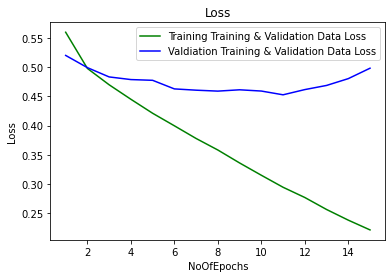

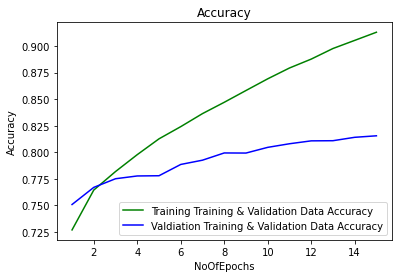

In [27]:
history_model_values = historyB.history  # Callback which records events into a History obj.
# Plotting graphs for following data
cnt = historyB.history['accuracy']
plot_accuracy_hists(range(1, len(cnt) + 1), history_model_values['loss'], history_model_values['val_loss'], 'NoOfEpochs', 'Loss', 'Training & Validation Data Loss', 'Loss')

plot_accuracy_hists(range(1, len(cnt) + 1), history_model_values['accuracy'], history_model_values['val_accuracy'], 'NoOfEpochs', 'Accuracy', 'Training & Validation Data Accuracy', 'Accuracy')

In [38]:
test.head(5)

,id,tid1,tid2,title1_en,title2_en,label
0,256442,100672,100673,"The great coat brother Zhu Zhu Wen, in the man...","Lin xinsheng after the birth of ""hard milking,...",unrelated
1,256443,162269,162270,NASA reveals facts about UFO wreckage found on...,"The UFO found in Yuancun, Jiaocheng County, Sh...",unrelated
2,256444,157826,157854,The hollow tomatoes are loaded with hormones.,"Li chenfan bingbing home photos, netizen: this...",unrelated
3,256445,109579,74076,Ange Pavilion Geoshui: How accurate is Matrimo...,Master one: the eight-character presumption of...,unrelated
4,256446,15068,15085,A 50-year-old bus-bus blows up an 8-year-old c...,< i > Joe Johnson's disgruntled timing and ord...,unrelated


In [29]:
x_test = test[['title1_en', 'title2_en']]
x_test.head()

,title1_en,title2_en
0,"The great coat brother Zhu Zhu Wen, in the man...","Lin xinsheng after the birth of ""hard milking,..."
1,NASA reveals facts about UFO wreckage found on...,"The UFO found in Yuancun, Jiaocheng County, Sh..."
2,The hollow tomatoes are loaded with hormones.,"Li chenfan bingbing home photos, netizen: this..."
3,Ange Pavilion Geoshui: How accurate is Matrimo...,Master one: the eight-character presumption of...
4,A 50-year-old bus-bus blows up an 8-year-old c...,< i > Joe Johnson's disgruntled timing and ord...


In [30]:
x_test['title1_tokenized'] = test.loc[:,'title1_en'].apply(do_tokenization)
x_test['title2_tokenized'] = test.loc[:,'title2_en'].apply(do_tokenization)

In [31]:
title1_temp = tokenizer.texts_to_sequences(x_test['title1_tokenized'])
x1_test = pad_sequences(title1_temp, maxlen=Max_Seq_Length)

title2_temp = tokenizer.texts_to_sequences(x_test['title2_tokenized'])
x2_test = pad_sequences(title2_temp, maxlen=Max_Seq_Length)

In [32]:
len(x2_test)

64110

In [33]:
data_predictionsA = modelA.predict([x1_test, x2_test])
data_predictionsA[:5]

array([[6.7107874e-01, 3.2892033e-01, 9.0129106e-07],
       [8.8463295e-01, 1.1533666e-01, 3.0367581e-05],
       [9.8948121e-01, 1.0488871e-02, 2.9989265e-05],
       [8.5749105e-02, 9.1425091e-01, 2.8719507e-08],
       [9.9761438e-01, 2.3341672e-03, 5.1438161e-05]], dtype=float32)

In [34]:
data_predictionsB = modelB.predict([x1_test, x2_test])
data_predictionsB[:5]

array([[6.9689405e-01, 3.0307335e-01, 3.2532571e-05],
       [7.3214787e-01, 2.6686549e-01, 9.8663801e-04],
       [9.9011081e-01, 8.7344591e-03, 1.1546521e-03],
       [7.8962851e-01, 2.0888177e-01, 1.4896814e-03],
       [9.9941742e-01, 4.5681992e-04, 1.2580316e-04]], dtype=float32)

In [35]:
index_to_label = { v : k for k , v in label_to_index . items ()}        
test['label'] = [ index_to_label [ idx ] for idx in np.argmax (data_predictionsA, axis = 1 )]

In [37]:
submission_data = test.loc[:, ['id', 'label']]
submission_data.columns = ['id', 'label']
submission_data.to_csv('submission.csv', index=False)